### ECG Signal Classification (5 classes) 
This file shows how  to load the data and get X_train, Y_train, X_test, Y_test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [3]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [4]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [5]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

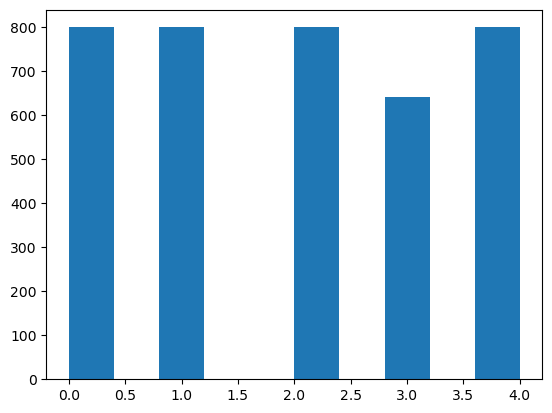

In [7]:
plt.hist(Y)

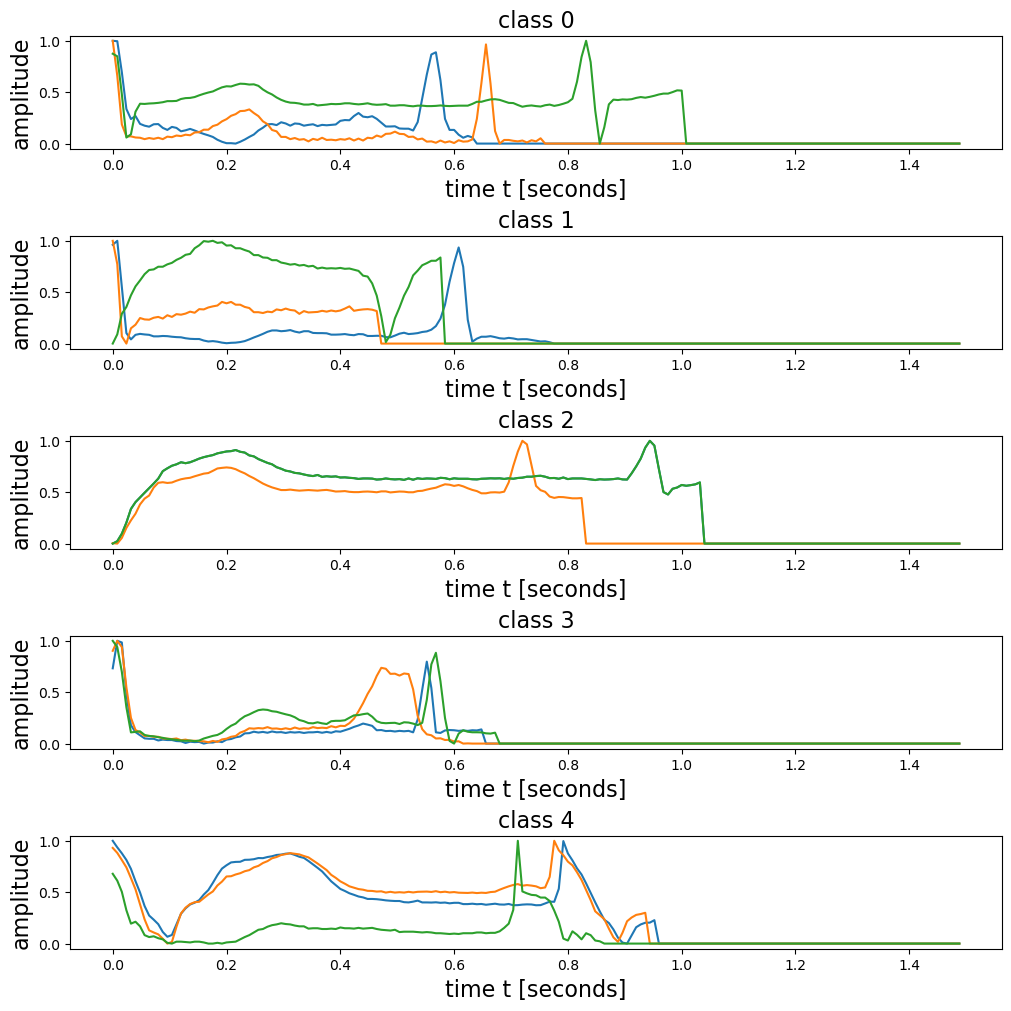

In [8]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

Split the data into a training set and a test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X_train.shape
#3072 samples in the training set, each sample has 187 elements

In [ ]:
[X_train.min(), X_train.max()] #no need for normalization

In [ ]:
Y_train.shape

In [ ]:
[Y_train.min(), Y_train.max()] #5 classes

In [ ]:
X_test.shape
#769 samples in the training set, each sample has 187 elements

In [ ]:
[X_test.min(), X_test.max()] #no need for normalization

In [ ]:
Y_test.shape

In [ ]:
[Y_test.min(), Y_test.max()] #5 classes

In [10]:
KNR = KNeighborsClassifier()
KNR.fit(X_train, Y_train)
#Xtt = X_test.to_numpy()
y_pred = KNR.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.881664499349805


In [11]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, Y_train)
y_pred = DTC.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.8426527958387516


In [13]:
LRM = LogisticRegression()
LRM.fit(X_train, Y_train)
y_pred = LRM.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))

0.764629388816645


/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
y_tpred = RFC.predict
y_pred = RFC.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.8998699609882965


In [23]:
ClassifierAccuracy = pd.DataFrame([('Training Accuracy', '0.8805338541666666', '0.7727864583333334', '1.0', '1.0'),
                   ('Test Accuracy', '0.881664499349805', '0.764629388816645', '0.8426527958387516', '0.8998699609882965')], 
                   columns = (' ', 'KNeighborsClassifier', 'LogisticRegression' , 'DecisionTreeClassifier', 'RandomForestClassifier'))

In [24]:
ClassifierAccuracy

,,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
0,Training Accuracy,0.8805338541666666,0.7727864583333334,1.0,1.0
1,Test Accuracy,0.881664499349805,0.764629388816645,0.8426527958387516,0.8998699609882965


In [15]:
1.0RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
y_tpred = RFC.predict(X_train)
print(metrics.accuracy_score(Y_train, y_tpred))

1.0


In [16]:
LRM = LogisticRegression()
LRM.fit(X_train, Y_train)
y_tpred = LRM.predict(X_train)
print(metrics.accuracy_score(Y_train, y_tpred))

0.7727864583333334


/Library/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, Y_train)
y_tpred = DTC.predict(X_train)
print(metrics.accuracy_score(Y_train, y_tpred))

1.0


In [21]:
KNR = KNeighborsClassifier()
KNR.fit(X_train, Y_train)
#Xtr = X_train.to_numpy()
y_tpred = KNR.predict(X_train)
print(metrics.accuracy_score(Y_train, y_tpred))

0.8805338541666666
